Import Necessary modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Load Clean Countries' data

In [4]:
df_benin = pd.read_csv("../data/benin_clean.csv")
df_sierraleone = pd.read_csv("../data/sierraleone-bumbuna_clean.csv")
df_togo = pd.read_csv("../data/togo-dapaong_qc_clean.csv")


In [7]:
df_benin['Country']='Benin'
df_sierraleone['Country']='Sierraleone'
df_togo['Country']='Togo'

df = pd.concat([df_benin, df_sierraleone, df_togo], ignore_index=True)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModB,Comments,GHI_z,DNI_z,DHI_z,ModA_z,ModB_z,WS_z,WSgust_z,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,26.2,NaN,-0.730027,-0.639591,-0.730700,-0.723726,-0.723035,-1.375662,-1.235481,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,26.2,NaN,-0.729724,-0.639591,-0.730700,-0.723726,-0.723035,-1.375662,-1.446199,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,26.2,NaN,-0.729724,-0.639591,-0.730700,-0.723726,-0.723035,-1.176473,-0.866724,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,26.3,NaN,-0.729724,-0.639209,-0.730035,-0.723726,-0.723035,-1.242869,-1.077442,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,26.3,NaN,-0.729422,-0.639209,-0.730035,-0.723726,-0.723035,-1.309266,-1.077442,Benin


Metrics Comparison

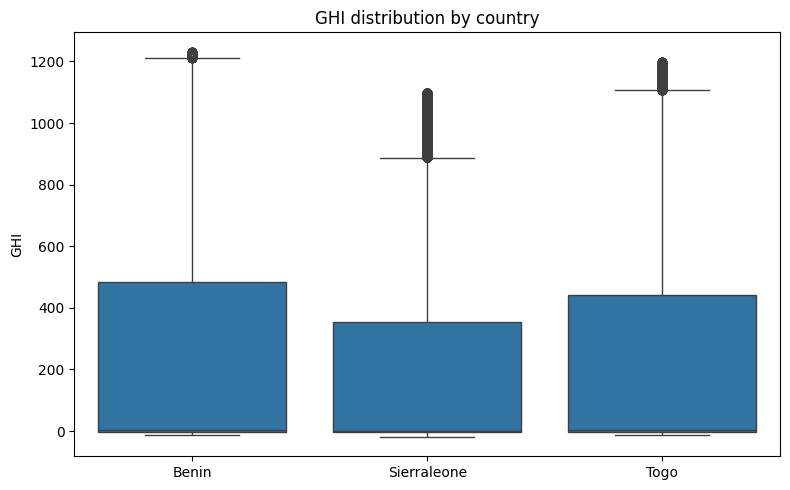

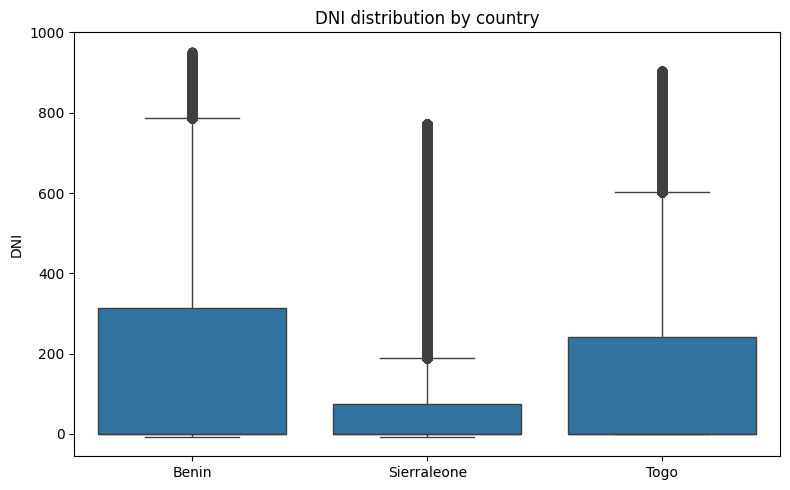

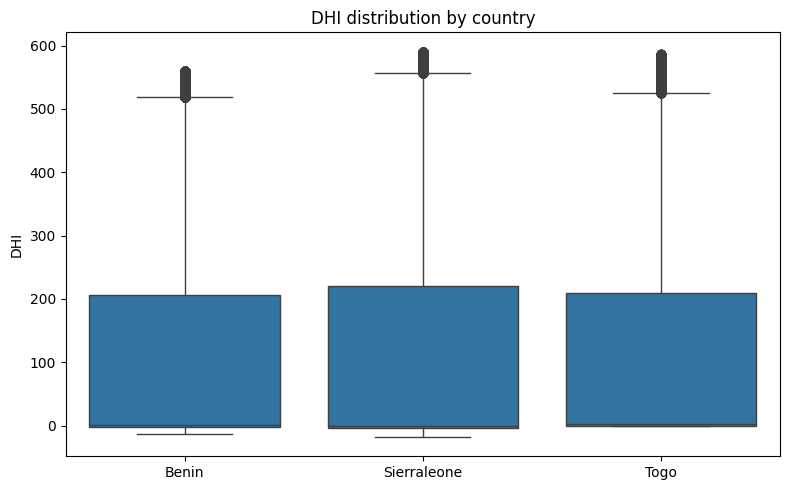

In [ ]:
metrics = ['GHI', 'DNI', 'DHI']

# Box Plots of specified Metrics
for m in metrics:
   plt.figure(figsize=(8,5))
   sns.boxplot(x='Country', y=m, data=df)
   plt.title(f'{m} distribution by country')
   plt.xlabel('')
   plt.tight_layout()
   plt.show()

Summary Table (Mean, Median, Standard Deviation)

In [ ]:
summary_list = [] # Initializing summary array
for country, g in df.groupby('Country'):
   row = {'Country': country}
   for m in metrics: # Calculating those values for the mentioned metrics
       row[f'{m}_mean'] = g[m].mean()
       row[f'{m}_median'] = g[m].median()
       row[f'{m}_std'] = g[m].std()
   summary_list.append(row)
summary_df = pd.DataFrame(summary_list).set_index('Country') # Creating a summary dataframe 
summary_df.round(3)

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,240.340,1.8,330.866,167.188,-0.1,261.711,107.677,1.6,149.088
Sierraleone,196.442,0.3,291.235,104.527,-0.1,201.696,110.110,-0.1,154.171
Togo,229.832,2.1,321.644,149.369,0.0,248.554,112.409,2.5,151.293


Statistical Testing

In [13]:
# Extract arrays
ghi_groups = [g['GHI'].dropna() for _, g in df.groupby('Country')]
f_stat, p_val = stats.f_oneway(*ghi_groups)
print(f"ANOVA on GHI: F = {f_stat:.4f}, p = {p_val:.4e}")
# If sample size small or non-normal, run Kruskal-Wallis (non-parametric)
krus_f, krus_p = stats.kruskal(*ghi_groups)
print(f"Kruskal-Wallis on GHI: H = {krus_f:.4f}, p = {krus_p:.4e}")

ANOVA on GHI: F = 2782.4139, p = 0.0000e+00
Kruskal-Wallis on GHI: H = 5142.3355, p = 0.0000e+00


Key Observations
1. Benin has the highest standard deviation in GHI and DNI, but the least in DHI; relatively showing a higher variabity and a lower variability on the mentioned metrics respectively.
2. Sierraleone consistently shows the least median throughout all metrics indicating that relatively it's skewed to the left.
3. Togo is contrary to what's been observed in the median of Sierraleone; in that it's consistently showing the highest median, suggesting that it's skewed to the right.

Visual Summary

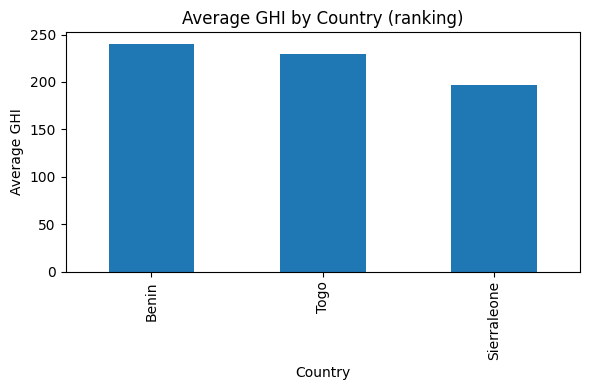

In [14]:
plt.figure(figsize=(6,4))
summary_df['GHI_mean'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Average GHI')
plt.title('Average GHI by Country (ranking)')
plt.tight_layout()
plt.show()